In [ ]:
#OK

In [1]:
using Plots
using DifferentialEquations
using JuliaMBD
using JuliaMBD.Diagram

In [ ]:
###draw.ioのブロックを変更した場合はApplyをきちんとし、draw.ioのファイルを保存し、@xmlmodel("METI_Vertical_Vibration.drawio", "ENG_MNT_F_PNT")のセルを実行した後、テストを実行できる

In [9]:
@model mus_f_pnt begin
    @parameter begin
        g=9.8
        M_Fr_wheel = 40
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "MUS_F_PNT") 
end



┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in4", "id" => "KlIxDls4G7GY65kbf2T8-24", "parent" => "KlIxDls4G7GY65kbf2T8-19", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/3ZWy5/src/diagrams/_xml2model.jl:76


mus_f_pnt (generic function with 1 method)

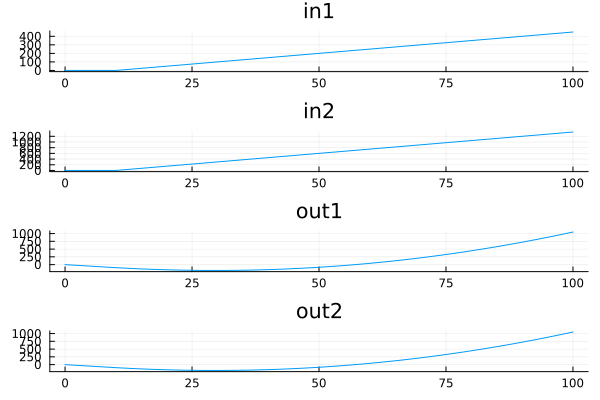

In [10]:
@model TestMus_f_pnt begin


    @block begin
        p = mus_f_pnt()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
    end
    @connect begin
        ramp1.out => p.in1 
        ramp2.out => p.in2
    end
    @scope begin
        p.in1 => in1
        p.in2 => in2
        p.out1 => out1 
        p.out2 => out2
    end
end
m = @compile TestMus_f_pnt()
res = simulate(m, tspan=[0, 100])
plot(res)